In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 1000)
parkingdata.size

13000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5185145,City Square,RUSSELL STREET,Lt COLLINS STREET,COLLINS STREET,1,C664,29/02/2012 09:03:01 AM,29/02/2012 09:04:35 AM,94,1P MTR M-SAT 7:30-19:30,0,1221,481
6969830,Queensberry,WALSH STREET,KING STREET,MILTON STREET,4,7121S,24/04/2012 04:37:40 PM,24/04/2012 05:04:11 PM,1591,2P TKT A M-F 7:30-18:30,0,1391,3648
1298403,Regency,LA TROBE STREET,EXHIBITION STREET,SPRING STREET,4,3611S,06/11/2011 02:38:34 PM,06/11/2011 04:24:46 PM,6372,2P SUN 7:30-18:30,0,856,2089
1884347,County,KING STREET,Lt BOURKE STREET,BOURKE STREET,2,1466E,22/11/2011 01:15:06 PM,22/11/2011 01:52:32 PM,2246,1P MTR M-F 10:00-16:00,0,839,890
2070265,Hyatt,FLINDERS STREET,EXHIBITION STREET,SPRING STREET,4,1587S,27/11/2011 11:14:01 AM,27/11/2011 12:24:50 PM,4249,2P SUN 7:30-18:30,0,670,1208


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
7507264,Magistrates,LONSDALE STREET,KING STREET,WILLIAM STREET,3,3166N,11/05/2012 03:34:23 PM,11/05/2012 03:42:10 PM,467,1/4P M-F 7:30-16:00,0,894,1855
8542285,Rialto,BOURKE STREET,KING STREET,WILLIAM STREET,3,2470N,12/06/2012 04:01:44 PM,12/06/2012 04:02:57 PM,73,1P MTR M-SAT 7:30-19:30,0,123,1483
3898092,Victoria Market,THERRY STREET,QUEEN STREET,ELIZABETH STREET,1,C7036,21/01/2012 07:32:39 AM,21/01/2012 07:42:23 AM,584,1P MTR M-SAT 7:30-19:30,0,1346,3599
196107,Hyatt,FLINDERS LANE,RUSSELL STREET,EXHIBITION STREET,4,1753S,07/10/2011 07:30:07 AM,07/10/2011 07:40:47 AM,640,LZ 15M M-F 7:30-19:30,0,669,1400
6666466,County,KING STREET,LONSDALE STREET,Lt BOURKE STREET,5,1485W,14/04/2012 05:06:04 PM,14/04/2012 05:20:54 PM,890,2P MTR SAT 7:30-20:30,0,839,794


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        109
Princes Theatre     72
Southbank           70
Victoria Market     65
Regency             60
City Square         59
Magistrates         54
The Mac             52
Titles              49
Hyatt               48
Chinatown           47
County              45
Rialto              44
Courtney            40
Spencer             38
Banks               36
Hardware            35
Jolimont            25
RACV                22
Supreme             21
Docklands            6
Tavistock            3
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5185145,CITY SQUARE,RUSSELL STREET,LT COLLINS STREET,COLLINS STREET,1,C664,29/02/2012 09:03:01 AM,29/02/2012 09:04:35 AM,94,1P MTR M-SAT 7:30-19:30,0,1221,481
6969830,QUEENSBERRY,WALSH STREET,KING STREET,MILTON STREET,4,7121S,24/04/2012 04:37:40 PM,24/04/2012 05:04:11 PM,1591,2P TKT A M-F 7:30-18:30,0,1391,3648
1298403,REGENCY,LA TROBE STREET,EXHIBITION STREET,SPRING STREET,4,3611S,06/11/2011 02:38:34 PM,06/11/2011 04:24:46 PM,6372,2P SUN 7:30-18:30,0,856,2089
1884347,COUNTY,KING STREET,LT BOURKE STREET,BOURKE STREET,2,1466E,22/11/2011 01:15:06 PM,22/11/2011 01:52:32 PM,2246,1P MTR M-F 10:00-16:00,0,839,890
2070265,HYATT,FLINDERS STREET,EXHIBITION STREET,SPRING STREET,4,1587S,27/11/2011 11:14:01 AM,27/11/2011 12:24:50 PM,4249,2P SUN 7:30-18:30,0,670,1208


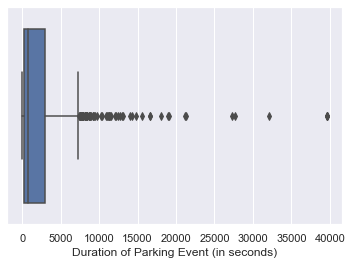

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET        103
LA TROBE STREET         76
QUEEN STREET            72
COLLINS STREET          58
ELIZABETH STREET        57
RUSSELL STREET          53
FRANKLIN STREET         40
EXHIBITION STREET       38
BOURKE STREET           38
LT LONSDALE STREET      33
FLINDERS LANE           32
ERROL STREET            28
SPRING STREET           26
KING STREET             24
COVENTRY STREET         21
LT COLLINS STREET       20
LT BOURKE STREET        17
VICTORIA STREET         17
QUEENSBERRY STREET      15
A'BECKETT STREET        15
WILLIAM STREET          14
DORCAS STREET           14
CAPEL STREET            14
THERRY STREET           10
SPENCER STREET          10
COBDEN STREET           10
HOWARD STREET            9
LEVESON STREET           9
STURT STREET             8
O'CONNELL STREET         7
GRANT STREET             7
KAVANAGH STREET          7
MARKET STREET            7
ALBERT STREET            7
FLINDERS STREET          7
FRANCIS STREET           6
SWANSTON STREET          5
G

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            116
QUEENSBERRY STREET      72
QUEEN STREET            66
SWANSTON STREET         56
WILLIAM STREET          53
RUSSELL STREET          52
EXHIBITION STREET       51
SPENCER STREET          49
LT LONSDALE STREET      42
COLLINS STREET          33
BOURKE STREET           33
LT COLLINS STREET       32
VICTORIA STREET         32
LONSDALE STREET         28
ELIZABETH STREET        21
FLINDERS LANE           21
LT BOURKE STREET        19
THERRY STREET           18
FLINDERS STREET         15
KINGS WAY               15
WELLS STREET            14
FRANKLIN STREET         14
ERROL STREET            13
STURT STREET            12
O'CONNELL STREET        11
SOUTHBANK BOULEVARD     10
LA TROBE STREET         10
WILLAM STREET           10
PEEL STREET              9
A'BECKETT STREET         8
ALBERT STREET            8
DODDS STREET             8
BALSTON STREET           7
COBDEN STREET            5
MACARTHUR STREET         4
PELHAM STREET            3
CITY ROAD                3
V

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET        110
VICTORIA STREET        89
ELIZABETH STREET       69
QUEEN STREET           62
EXHIBITION STREET      53
RUSSELL STREET         52
SPRING STREET          52
KING STREET            49
FLINDERS LANE          48
LONSDALE STREET        42
LT COLLINS STREET      33
COLLINS STREET         32
LT BOURKE STREET       28
DODDS STREET           22
SWANSTON STREET        21
FLINDERS STREET        21
BOURKE STREET          19
LA TROBE STREET        18
FRANKLIN STREET        18
ST KILDA ROAD          14
LEVESON STREET         13
LT LONSDALE STREET     13
POWER STREET           10
A'BECKETT STREET        9
HAWKE STREET            8
MILES STREET            8
WELLS STREET            8
LANSDOWNE STREET        7
CATHEDRAL PLACE         6
THERRY STREET           6
QUEENSBERRY STREET      5
WALSH STREET            5
DUDLEY STREET           5
SPENCER STREET          4
O'CONNELL STREET        4
EADES STREET            3
CAPEL STREET            3
KAVANAGH STREET         3
MILTON STREE

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5185145,CITY SQUARE,RUSSELL STREET,LT COLLINS STREET,COLLINS STREET,1,C664,2012-02-29 09:03:01,2012-02-29 09:04:35,94,1P MTR M-SAT 7:30-19:30,0,1221,481
6969830,QUEENSBERRY,WALSH STREET,KING STREET,MILTON STREET,4,7121S,2012-04-24 16:37:40,2012-04-24 17:04:11,1591,2P TKT A M-F 7:30-18:30,0,1391,3648
1298403,REGENCY,LA TROBE STREET,EXHIBITION STREET,SPRING STREET,4,3611S,2011-06-11 14:38:34,2011-06-11 16:24:46,6372,2P SUN 7:30-18:30,0,856,2089
1884347,COUNTY,KING STREET,LT BOURKE STREET,BOURKE STREET,2,1466E,2011-11-22 13:15:06,2011-11-22 13:52:32,2246,1P MTR M-F 10:00-16:00,0,839,890
2070265,HYATT,FLINDERS STREET,EXHIBITION STREET,SPRING STREET,4,1587S,2011-11-27 11:14:01,2011-11-27 12:24:50,4249,2P SUN 7:30-18:30,0,670,1208


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
7507264,MAGISTRATES,LONSDALE STREET,KING STREET,WILLIAM STREET,3,3166N,2012-11-05 15:34:23,2012-11-05 15:42:10,467,1/4P M-F 7:30-16:00,0,894,1855
8542285,RIALTO,BOURKE STREET,KING STREET,WILLIAM STREET,3,2470N,2012-12-06 16:01:44,2012-12-06 16:02:57,73,1P MTR M-SAT 7:30-19:30,0,123,1483
3898092,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,1,C7036,2012-01-21 07:32:39,2012-01-21 07:42:23,584,1P MTR M-SAT 7:30-19:30,0,1346,3599
196107,HYATT,FLINDERS LANE,RUSSELL STREET,EXHIBITION STREET,4,1753S,2011-07-10 07:30:07,2011-07-10 07:40:47,640,LZ 15M M-F 7:30-19:30,0,669,1400
6666466,COUNTY,KING STREET,LONSDALE STREET,LT BOURKE STREET,5,1485W,2012-04-14 17:06:04,2012-04-14 17:20:54,890,2P MTR SAT 7:30-20:30,0,839,794


### KNN Classification Model on Predicitive Analytics question 3

In [19]:
#Target field identification
target = parkingdata['Street Name']

unique_vals = target.unique()
target.replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

target.head(10)

5185145     0
6969830     1
1298403     2
1884347     3
2070265     4
10028927    5
9326753     6
4549544     7
5713171     0
1960898     7
Name: Street Name, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Street Name', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
5185145,0,0,0,0,0,1,94,1221,481,9,9
6969830,1,1,1,1,0,4,1591,1391,3648,16,17
1298403,2,2,2,2,0,4,6372,856,2089,14,16
1884347,3,3,3,3,0,2,2246,839,890,13,13
2070265,4,2,2,2,0,4,4249,670,1208,11,12
10028927,5,4,4,1,0,2,545,706,6563,13,13
9326753,3,1,5,0,0,1,514,894,5608,12,13
4549544,6,5,6,0,0,1,70,1171,731,18,18
5713171,2,5,6,4,0,1,2063,1221,417,15,15
1960898,6,6,7,5,0,5,185,1171,696,11,11


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [23]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2532 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3360 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  2.5min finished


In [24]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a =  bestModel.best_estimator_.get_params()['algorithm']
best_l =  bestModel.best_estimator_.get_params()['leaf_size']
best_p =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 1
Best weights: uniform
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.584
1,auto,10,1,1,distance,0.584
2,auto,10,1,2,uniform,0.525
3,auto,10,1,2,distance,0.525
4,auto,10,1,5,uniform,0.494
5,auto,10,1,5,distance,0.494
6,auto,10,2,1,uniform,0.522
7,auto,10,2,1,distance,0.584
8,auto,10,2,2,uniform,0.460
9,auto,10,2,2,distance,0.525


In [27]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [28]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.18
Score with 2 selected features: 0.565
Score with 3 selected features: 0.6
Score with 4 selected features: 0.725
Score with 5 selected features: 0.97
Score with 6 selected features: 0.97

Indexs of the desired features
[2, 3, 1, 0, 7, 5]


In [29]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 2,Sign,Between Street 1,Area Name,Street ID,Side Of Street
5185145,0,0,0,0,1221,1
6969830,1,1,1,1,1391,4
1298403,2,2,2,2,856,4
1884347,3,3,3,3,839,2
2070265,2,2,2,4,670,4
10028927,4,1,4,5,706,2
9326753,5,0,1,3,894,1
4549544,6,0,5,6,1171,1
5713171,6,4,5,2,1221,1
1960898,7,5,6,6,1171,5


In [30]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  1.0min finished


In [31]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [32]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 1
Best weights: uniform
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.937
1,auto,10,1,1,distance,0.937
2,auto,10,1,2,uniform,0.921
3,auto,10,1,2,distance,0.921
4,auto,10,1,5,uniform,0.914
5,auto,10,1,5,distance,0.914
6,auto,10,2,1,uniform,0.898
7,auto,10,2,1,distance,0.936
8,auto,10,2,2,uniform,0.874
9,auto,10,2,2,distance,0.921


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[29  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 52 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]]

[Train/test split] score: 0.94400


In [36]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.95000
[fold 1] score: 0.96000
[fold 2] score: 0.92000
[fold 3] score: 0.95000
[fold 4] score: 0.95000

KNN mean score [5 folds] = 0.946
